In [2]:
import numpy as np 
import pandas as pd
pd.set_option('display.float_format', lambda x:'%.3f' %x)

In [3]:
import math 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [5]:
import numpy as np 
import pandas as pd 
pd.options.display.float_format = "{:,.2f}".format
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import os

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
TRAIN_PATH = "./train_data.csv"
TEST_PATH = "./test_data.csv"
SAMPLE_SUBMISSION_PATH = "./sample_solution.csv"
SUBMISSION_PATH = "submission.csv"

In [36]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=["startdate"])
test_df = pd.read_csv(TEST_PATH, parse_dates=["startdate"])

train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.00,0.83,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.00,0.83,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.00,0.83,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.00,0.83,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.00,0.83,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [37]:
submit = pd.read_csv(SAMPLE_SUBMISSION_PATH)

In [38]:
train_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [39]:
train_df.dtypes

index                                          int64
lat                                          float64
lon                                          float64
startdate                             datetime64[ns]
contest-pevpr-sfc-gauss-14d__pevpr           float64
                                           ...      
wind-vwnd-925-2010-16                        float64
wind-vwnd-925-2010-17                        float64
wind-vwnd-925-2010-18                        float64
wind-vwnd-925-2010-19                        float64
wind-vwnd-925-2010-20                        float64
Length: 246, dtype: object

In [40]:
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.00,0.83,2022-11-01,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.00,0.83,2022-11-02,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.00,0.83,2022-11-03,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.00,0.83,2022-11-04,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.00,0.83,2022-11-05,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [41]:
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (375734, 246)
Training dataset shape: (31354, 245)


In [42]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,"375,734.00","187,866.50","108,465.21",0.00,"93,933.25","187,866.50","281,799.75","375,733.00"
lat,"375,734.00",0.59,0.25,0.00,0.41,0.59,0.82,1.00
lon,"375,734.00",0.52,0.27,0.00,0.30,0.53,0.77,1.00
contest-pevpr-sfc-gauss-14d__pevpr,"375,734.00",276.74,198.09,-2.31,104.06,250.32,420.01,"1,185.14"
nmme0-tmp2m-34w__cancm30,"375,734.00",10.80,10.95,-14.96,1.55,9.95,20.23,36.08
...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,"375,734.00",-9.85,34.16,-106.08,-32.17,-8.56,10.50,83.89
wind-vwnd-925-2010-17,"375,734.00",-6.23,27.05,-93.98,-20.17,-6.03,11.63,64.85
wind-vwnd-925-2010-18,"375,734.00",16.01,25.85,-52.61,-0.36,18.65,31.21,90.39
wind-vwnd-925-2010-19,"375,734.00",10.49,25.07,-66.11,-6.79,11.86,29.04,76.89


In [43]:
l0 = train_df.shape[0]
train_df.drop_duplicates(inplace=True)
l1 = train_df.shape[0]
print(f'{l0-l1} rows were dropped.')

0 rows were dropped.


In [44]:
#defining target variable

target = 'contest-tmp2m-14d__tmp2m'

<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

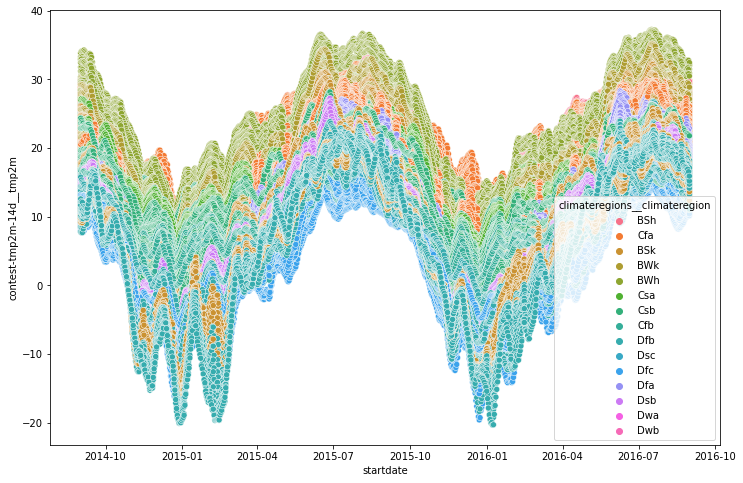

In [45]:
sns.scatterplot(x=train_df.startdate, y=train_df[target], hue=train_df.climateregions__climateregion, data=train_df)

<AxesSubplot:xlabel='contest-tmp2m-14d__tmp2m', ylabel='Density'>

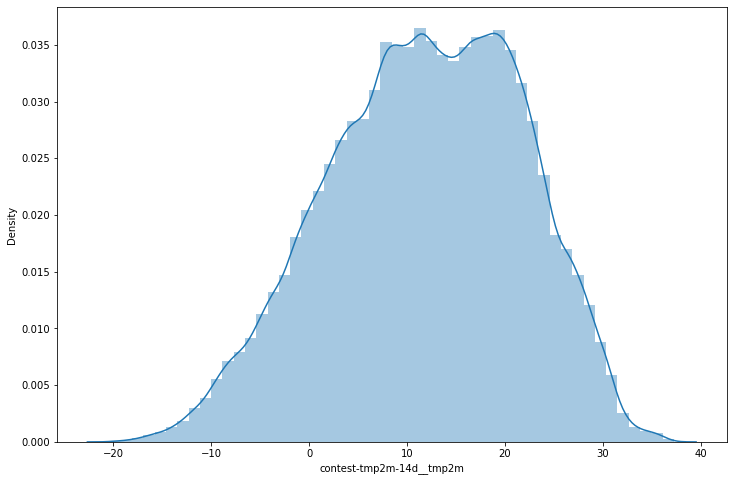

In [46]:
sns.distplot(train_df[target])

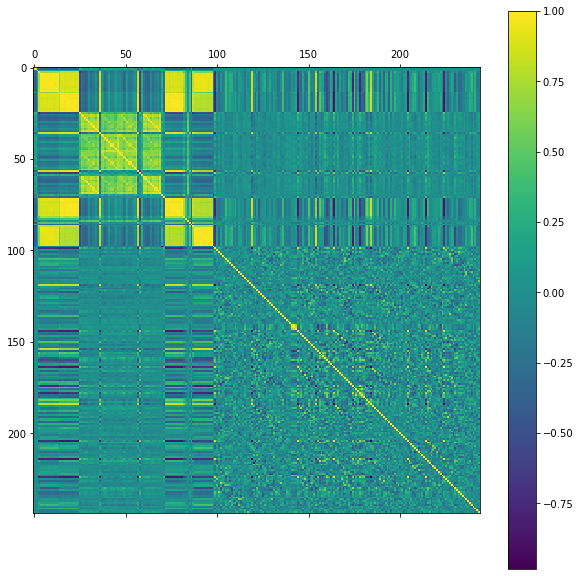

In [47]:
#Computing pair-wise correlation between continuous columns and drop one if this is greater than a threshold

f = plt.figure(figsize=(10, 10))
plt.matshow(train_df.corr(), fignum=f.number)
plt.colorbar()
plt.show()

* many continuous columns with high correlation

In [48]:
#Finding pair features with high correlations

def correlation(dataframe, threshold):
    high_corr = set() 
    drop = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and ((corr_matrix.columns[j], corr_matrix.columns[i]) not in high_corr):
                columns = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]) # getting the name of the columns
                high_corr.add(columns)
                drop.add(corr_matrix.columns[i])

    return high_corr, drop

In [49]:
thr = 0.8

high_corr, drop = correlation(train_df, thr)
print('These pairs have abosolute correlation greater than: ', thr)
print(high_corr)

These pairs have abosolute correlation greater than:  0.8
{('cfsv20', 'ccsm40', 0.9846568453080684), ('nmme-tmp2m-34w__nmmemean', 'nmme-tmp2m-34w__nasa', 0.9746034041785524), ('nmme-tmp2m-34w__gfdl', 'nmme-tmp2m-56w__gfdlflorb', 0.9776987238666759), ('nmme-tmp2m-34w__cfsv2', 'nmme0-tmp2m-34w__cancm40', 0.8709475097364605), ('sst-2010-1', 'ccsm30', 0.8309980114126176), ('mei__nip', 'mei__meirank', 0.8144710110763039), ('nmme-tmp2m-34w__ccsm3', 'nmme-tmp2m-56w__cfsv2', 0.9419435538037226), ('nmme-tmp2m-34w__nasa', 'nmme-tmp2m-34w__gfdlflorb', 0.9647033315035368), ('nmme-tmp2m-34w__gfdl', 'nmme-tmp2m-56w__ccsm4', 0.9807667114481415), ('sst-2010-1', 'nmme0-tmp2m-34w__gfdl0', 0.8456842691031587), ('wind-hgt-500-2010-7', 'wind-hgt-850-2010-8', -0.8358354048837929), ('nmme-tmp2m-34w__gfdlflora', 'nmme0-tmp2m-34w__ccsm30', 0.8818739016051412), ('nmme0-tmp2m-34w__nasa0', 'nmme0-tmp2m-34w__ccsm30', 0.9528066579983003), ('wind-hgt-850-2010-1', 'nmme-tmp2m-56w__nasa', -0.8435735676267413), ('icec-

In [50]:
print('Number of variables can be dropped:', len(drop))
drop

Number of variables can be dropped: 91


{'cancm30',
 'cancm40',
 'ccsm30',
 'ccsm40',
 'cfsv20',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-tmp2m-14d__tmp2m',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-wind-h500-14d__wind-hgt-500',
 'elevation__elevation',
 'gfdl0',
 'gfdlflora0',
 'gfdlflorb0',
 'icec-2010-1',
 'icec-2010-5',
 'lat',
 'mei__meirank',
 'mei__nip',
 'nasa0',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nmmemean',
 'nmme-prate-56w__cancm3',
 'nmme-prate-56w__cancm4',
 'nmme-prate-56w__ccsm3',
 'nmme-prate-56w__ccsm4',
 'nmme-prate-56w__cfsv2',
 'nmme-prate-56w__gfdl',
 'nmme-prate-56w__gfdlflora',
 'nmme-prate-56w__gfdlflorb',
 'nmme-prate-56w__nasa',
 'nmme-prate-56w__nmmemean',
 'nmme-tmp2m-34w__cancm3',
 'nmme-tmp2m-34w__cancm4',
 'nmme-tmp2m-34w__ccsm3',
 'nmme-tmp2m-34w__ccsm4',
 'nmme-tmp2m-34w__cfsv2',
 'nmme-tmp2m-34w__gfdl',
 'nmme-tmp2m-34w__gfdlflora',
 'nmme-tmp2m-34w__gfdlflorb',
 'nmme-tmp2m-34w__nasa',
 'nmme-tmp2m-34w__nmmemean',
 '

In [51]:
# Exclude target
drop.remove(target)

In [52]:
# Exclude lat
drop.remove('lat')

In [53]:
#Exclude one of the high correlated pairs


to_drop = list(drop)

train_df.drop(columns=to_drop, axis=1, inplace=True)
test_df.drop(columns=to_drop, axis=1, inplace=True)

# Check shapes
print(f'Training dataset shape: {train_df.shape}')
print(f'Training dataset shape: {test_df.shape}')

Training dataset shape: (375734, 157)
Training dataset shape: (31354, 156)


In [54]:
#Separating categorical and continuous features

categorical_columns = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
continuous_columns = train_df.dtypes[train_df.dtypes != "object"].index.tolist()

In [55]:
print(categorical_columns)

['climateregions__climateregion']


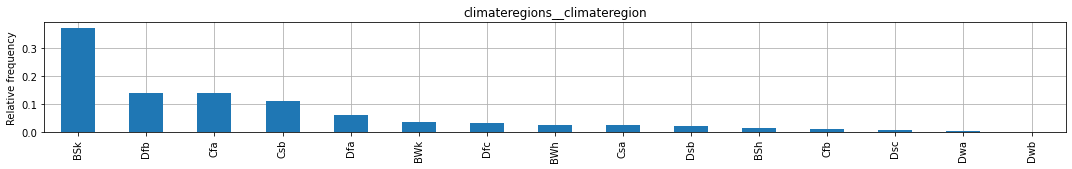

In [56]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
relative_freq = plot_distbn(train_df[categorical_columns[0]], categorical_columns[0], 312)

In [57]:
relative_freq

BSk   0.37
Dfb   0.14
Cfa   0.14
Csb   0.11
Dfa   0.06
BWk   0.04
Dfc   0.03
BWh   0.03
Csa   0.03
Dsb   0.02
BSh   0.01
Cfb   0.01
Dsc   0.01
Dwa   0.00
Dwb   0.00
Name: climateregions__climateregion, dtype: float64

In [58]:
sum(relative_freq[:5])

0.8190661478599222

In [59]:
#Top 5 categories of climateregions__climateregion


significant = relative_freq.index[:5].tolist()
print(significant)

['BSk', 'Dfb', 'Cfa', 'Csb', 'Dfa']


* The top 5 values of climateregions__climateregion include ~ 82% of the data points. We will merge all other values into 'Others'.

In [60]:
#merging categories

train_df['climateregions__climateregion'].loc[~train_df['climateregions__climateregion'].isin(significant)] = 'Others'
test_df['climateregions__climateregion'].loc[~test_df['climateregions__climateregion'].isin(significant)] = 'Others'

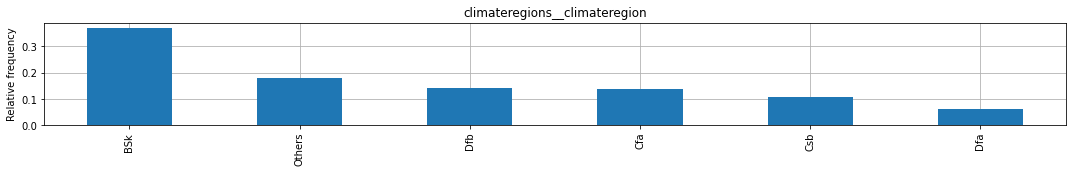

In [61]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)


plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
rel_freqs2 = plot_distbn(train_df[categorical_columns[0]], categorical_columns[0], 312)

<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

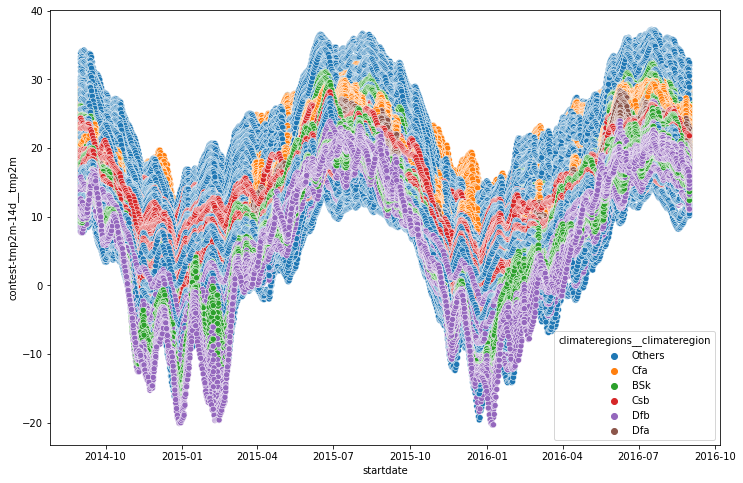

In [62]:
#Target distribution for different climateregions after category merge

sns.scatterplot(x=train_df.startdate, y=train_df[target], hue=train_df.climateregions__climateregion, data=train_df)

In [63]:
#Checking proportion of missing values in each column

def count_missing_values(dataframe):  
    total = dataframe.isnull().sum()
    percent = (dataframe.isnull().sum())*100/(len(dataframe))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total'] > 0]
    missing_data.sort_values('Total', ascending=False, inplace=True)
    print(missing_data)
    
    return 

count_missing_values(train_df)

                         Total  Percent
nmme0-prate-56w__ccsm30  15934     4.24
nmme-prate-34w__ccsm3     8738     2.33


In [64]:
count_missing_values(test_df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [65]:
def impute_missing(df):
    df = df.sort_values(by=['startdate']).ffill()
    df[continuous_columns] = df[continuous_columns].fillna(df[continuous_columns].median())
    return df

In [66]:
def derive_features(df):
    df['year'] = df['startdate'].dt.year
    df['month'] = df['startdate'].dt.month
    df['day_of_year'] = df['startdate'].dt.dayofyear
    return df

In [67]:
def categorical_encode(train, test):
    le = LabelEncoder()
    train['climateregions__climateregion'] = le.fit_transform(train['climateregions__climateregion'])
    test['climateregions__climateregion'] = le.transform(test['climateregions__climateregion'])
    return train, test

In [68]:
def feature_engineering(train, test):
    train = impute_missing(train)
    
    train = derive_features(train)
    test = derive_features(test)
    
    train, test = categorical_encode(train, test)

    drop_cols = ['index', 'startdate', 'lat', 'lon', target]
    
    predictors = [col for col in train.columns if col not in drop_cols]
    
    X = train[predictors]
    y = train[target]
    
    X_test = test[predictors]

    return X, y, X_test

In [69]:
X, y, X_test = feature_engineering(train_df.copy(), test_df.copy())

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'Training Shape: {X_train.shape}    |   Validation Shape: {X_val.shape}    |   Test Shape: {X_test.shape}')

Training Shape: (281800, 155)    |   Validation Shape: (93934, 155)    |   Test Shape: (31354, 155)


In [71]:
#Linear Regression


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

lr_train_r_sq = linear_model.score(X_train, y_train)
lr_val_r_sq = linear_model.score(X_val, y_val)

predictions_val = linear_model.predict(X_val)
lr_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = linear_model.predict(X_train)
lr_train_mse = mean_squared_error(y_train, predictions_train)

    
print("\nLinear Regression: Validation set R-Squared: {:5.4f} ".format(abs(lr_val_r_sq)))    
print("Linear Regression: Training set R-Squared: {:5.4f} ".format(abs(lr_train_r_sq))) 

print("\nLinear Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(lr_val_mse)))
print("Linear Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(lr_train_mse)))


Linear Regression: Validation set R-Squared: 0.9652 
Linear Regression: Training set R-Squared: 0.9648 

Linear Regression: Validation set RMSE: 1.8414 
Linear Regression: Training set RMSE: 1.8502 


In [72]:
submit[target] = linear_model.predict(X_test)
submit.to_csv('linearregression_submission.csv', index = False)

In [73]:
#Decision tree

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=10, random_state=0)

tree_model = tree_model.fit(X_train, y_train)

print(tree_model)
tree_train_r_sq = tree_model.score(X_train, y_train)
tree_val_r_sq = tree_model.score(X_val, y_val)

predictions_val = tree_model.predict(X_val)
tree_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = tree_model.predict(X_train)
tree_train_mse = mean_squared_error(y_train, predictions_train)

    
print("\nDecisionTree Regression: Validation set R-Squared: {:5.4f} ".format(abs(tree_val_r_sq)))    
print("DecisionTree Regression: Training set R-Squared: {:5.4f} ".format(abs(tree_train_r_sq))) 

print("\nDecisionTree Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(tree_val_mse)))
print("DecisionTree Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(tree_train_mse)))

DecisionTreeRegressor(max_depth=10, random_state=0)

DecisionTree Regression: Validation set R-Squared: 0.9542 
DecisionTree Regression: Training set R-Squared: 0.9565 

DecisionTree Regression: Validation set RMSE: 2.1121 
DecisionTree Regression: Training set RMSE: 2.0576 


In [74]:
submit[target] = linear_model.predict(X_test)
submit.to_csv('decisiontree_submission.csv', index = False)

In [75]:
#random forest classifier


from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=20)

rf_model = rf_model.fit(X_train, y_train)

rf_train_r_sq = rf_model.score(X_train, y_train)
rf_val_r_sq = rf_model.score(X_val, y_val)

predictions_val = rf_model.predict(X_val)
rf_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, predictions_train)


print("\nRandom Forest Regression: Validation set R-Squared: {:5.4f} ".format(abs(rf_val_r_sq)))    
print("Random Forest Regression: Training set R-Squared: {:5.4f} ".format(abs(rf_train_r_sq))) 


print("\nRandom Forest Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(rf_val_mse)))
print("Random Forest Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(rf_train_mse)))


Random Forest Regression: Validation set R-Squared: 0.9692 
Random Forest Regression: Training set R-Squared: 0.9707 

Random Forest Regression: Validation set RMSE: 1.7334 
Random Forest Regression: Training set RMSE: 1.6888 


In [76]:
submit[target] = rf_model.predict(X_test)
submit.to_csv('randomforest_submission.csv', index = False)

In [77]:
#multi_layer_perceptron MLP regressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")

est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(hidden_layer_sizes=(40,),
                 activation='relu', 
                 solver='adam', 
                 learning_rate_init=0.01,
                 max_iter=20,
                 early_stopping=True,
                 n_iter_no_change=5,
                 verbose=True,
                random_state=0)
)
est.fit(X_train, y_train)

mlp_train_r_sq = est.score(X_train, y_train)
mlp_val_r_sq = est.score(X_val, y_val)

predictions_val = est.predict(X_val)
mlp_val_mse = mean_squared_error(y_val, predictions_val)

predictions_train = est.predict(X_train)
mlp_train_mse = mean_squared_error(y_train, predictions_train)


print("\nMLPRegressor Regression: Validation set R-Squared: {:5.4f} ".format(abs(mlp_val_r_sq)))    
print("MLPRegressort Regression: Training set R-Squared: {:5.4f} ".format(abs(mlp_train_r_sq))) 


print("\nMLPRegressor Regression: Validation set RMSE: {:5.4f} ".format(math.sqrt(mlp_val_mse)))
print("MLPRegressor Regression: Training set RMSE: {:5.4f} ".format(math.sqrt(mlp_train_mse)))

Training MLPRegressor...
Iteration 1, loss = 5.15517707
Validation score: 0.945586
Iteration 2, loss = 2.37659314
Validation score: 0.958251
Iteration 3, loss = 1.97310437
Validation score: 0.960840
Iteration 4, loss = 1.83848123
Validation score: 0.957296
Iteration 5, loss = 1.73722304
Validation score: 0.966550
Iteration 6, loss = 1.67129513
Validation score: 0.963730
Iteration 7, loss = 1.61899666
Validation score: 0.923817
Iteration 8, loss = 1.59710642
Validation score: 0.968853
Iteration 9, loss = 1.54157572
Validation score: 0.963427
Iteration 10, loss = 1.49016056
Validation score: 0.955412
Iteration 11, loss = 1.40624247
Validation score: 0.973450
Iteration 12, loss = 1.34608999
Validation score: 0.972108
Iteration 13, loss = 1.31997925
Validation score: 0.973646
Iteration 14, loss = 1.29612929
Validation score: 0.968947
Iteration 15, loss = 1.28358812
Validation score: 0.966452
Iteration 16, loss = 1.26144013
Validation score: 0.966261
Iteration 17, loss = 1.25987013
Validati

In [78]:
submit[target] = est.predict(X_test)
submit.to_csv('mlpregressor_submission.csv', index = False)

In [79]:
val_error=[rf_val_mse, tree_val_mse, lr_val_mse, mlp_val_mse]

val_rmse=[math.sqrt(rf_val_mse), math.sqrt(tree_val_mse), math.sqrt(lr_val_mse), math.sqrt(mlp_val_mse)]

train_rmse=[math.sqrt(rf_train_mse), math.sqrt(tree_train_mse), math.sqrt(lr_train_mse), math.sqrt(mlp_train_mse)]

val_r2=[rf_val_r_sq, tree_val_r_sq, lr_val_r_sq, mlp_val_r_sq]

train_r2=[rf_train_r_sq, tree_train_r_sq, lr_train_r_sq, mlp_train_r_sq]

col={'Validation RMSE':val_rmse, 'Train RMSE':train_rmse, 'Validation R-Squared':val_r2, 'Train R-Squared':train_r2}

models=['Random Forest', 'Decision Tree', 'Linear', 'MLPRegressor(sklearn)']
df=pd.DataFrame(data=col,index=models)
df.sort_values('Validation RMSE', inplace = True)
df

,Validation RMSE,Train RMSE,Validation R-Squared,Train R-Squared
MLPRegressor(sklearn),1.52,1.51,0.98,0.98
Random Forest,1.73,1.69,0.97,0.97
Linear,1.84,1.85,0.97,0.96
Decision Tree,2.11,2.06,0.95,0.96
